In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_provider_json = pd.read_json("un_datathon_dataprovider.json")
data_provider_json

,hostname,tld,domain,subdomains,subdomainscount,response,continent,country,region,contactable,...,since,dateadded,websiteage,gps,crm,emailservices,affiliates,livechat,mobileapp,appointmentschedulingservices
0,dnamusic.edu.co,co,dnamusic.edu.co,None,NaN,Available,South America,CO,None,"[Address, Social media profile, Phone number]",...,2024-10-07T19:43:59.000000Z,None,NaN,None,None,None,None,[WhatsApp Business],None,None
1,importcaribe.com.co,co,importcaribe.com.co,None,NaN,Available,South America,CO,None,[Email address],...,2024-10-07T19:17:03.000000Z,None,NaN,None,None,[Microsoft 365],None,[WhatsApp Business],None,None
2,www.fundacionantivirusparaladesercion.org,org,fundacionantivirusparaladesercion.org,None,NaN,Available,South America,CO,Antioquia,"[Address, Social media profile, Phone number]",...,2024-10-07T19:34:22.000000Z,2022-09-18T00:00:00.000000Z,12.0,None,None,[Microsoft 365],None,[WhatsApp Business],None,None
3,cicobessas.com,com,cicobessas.com,None,NaN,Available,South America,CO,None,"[Address, Email address, Phone number]",...,2024-10-07T19:57:49.000000Z,2015-12-30T00:00:00.000000Z,68.0,None,None,None,None,[WhatsApp Business],None,None
4,www.dakarwheels.com.co,co,dakarwheels.com.co,None,NaN,Available,South America,CO,None,"[Address, Social media profile, Phone number]",...,2024-10-07T19:25:20.000000Z,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8360,www.parrillapimienta.com,com,parrillapimienta.com,None,NaN,Available,South America,CO,None,"[Address, Social media profile, Phone number]",...,2024-10-07T10:27:16.000000Z,2024-06-25T00:00:00.000000Z,3.0,None,None,None,None,None,None,None
8361,pedagogicoclaret.com,com,pedagogicoclaret.com,None,NaN,Available,South America,CO,None,"[Address, Social media profile]",...,2024-10-07T10:53:13.000000Z,2017-10-01T00:00:00.000000Z,52.0,None,None,None,None,None,None,None
8362,www.asignar.com.co,co,asignar.com.co,None,NaN,Available,South America,CO,None,"[Address, Social media profile, Phone number]",...,2024-10-07T11:05:13.000000Z,None,NaN,None,None,None,None,None,None,None
8363,laboratoriosorel.com,com,laboratoriosorel.com,[www],1.0,Available,South America,CO,None,"[Address, Social media profile, Phone number]",...,2024-10-07T10:57:10.000000Z,2014-11-12T00:00:00.000000Z,32.0,None,None,None,None,[Facebook Messenger],None,None


In [3]:
data_provider_json.keys()

Index(['hostname', 'tld', 'domain', 'subdomains', 'subdomainscount',
       'response', 'continent', 'country', 'region', 'contactable', 'address',
       'addresses', 'zipcode', 'city', 'phonenumber', 'phonenumbers',
       'company', 'companyquality', 'legalentity', 'siccode', 'sicscore',
       'sicmajorgroup', 'sicdivision', 'secondarysiccodes', 'business',
       'businessmodel', 'ecommerce', 'ecommercequality', 'scs',
       'paymentmethods', 'psp', 'type', 'pagetypes', 'language', 'title',
       'description', 'keywords', 'relevantkeywords', 'brandnames', 'features',
       'category', 'websitetopics', 'incominglinks', 'outgoinglinks', 'eii',
       'activity', 'socialplatforms', 'bookingengines', 'pointofsalesystems',
       'hostingcountry', 'sslcertificate', 'scanrequestid', 'date', 'since',
       'dateadded', 'websiteage', 'gps', 'crm', 'emailservices', 'affiliates',
       'livechat', 'mobileapp', 'appointmentschedulingservices'],
      dtype='object')

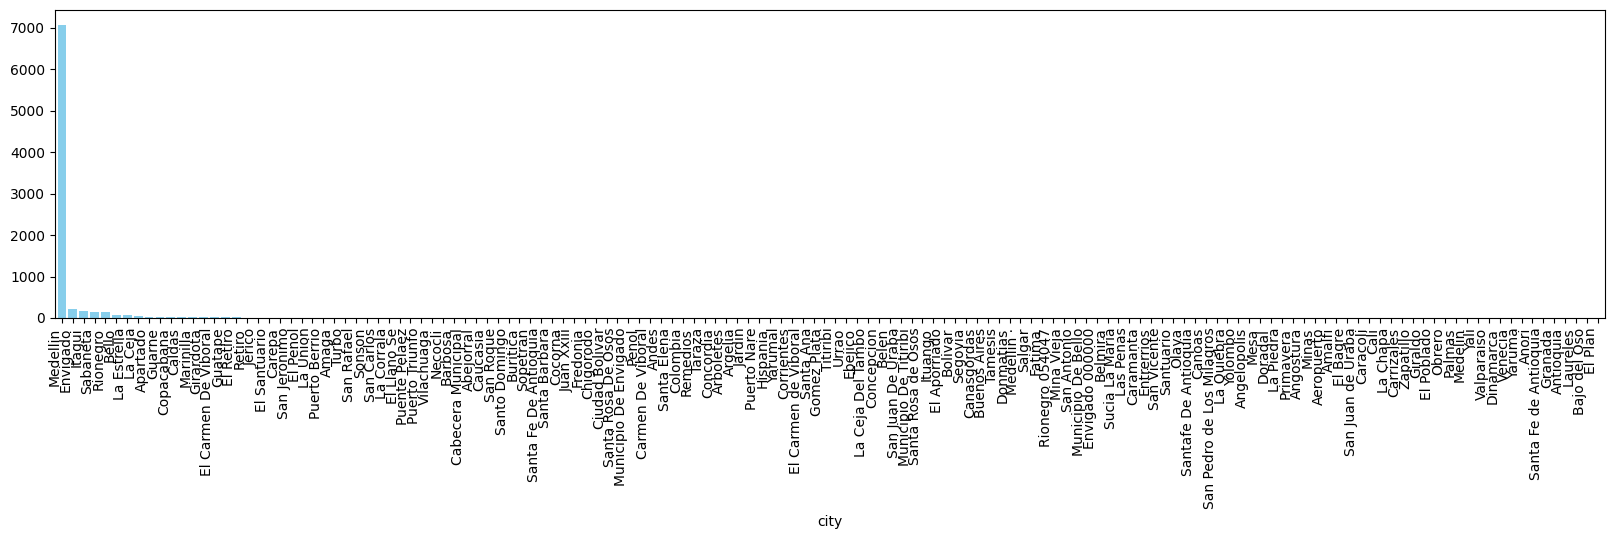

In [4]:
fig_cities = plt.figure(figsize=(20, 4))
data_provider_json["city"].value_counts().plot(kind='bar', width=0.8, color='skyblue')
plt.xticks(rotation=90, ha="right")
plt.grid(False)

In [5]:
#Filtrar datos solo para medellin
data_medellin = data_provider_json[data_provider_json["city"]=="Medellin"]

Text(0.5, 1.0, 'Frecuencia de Tipos de Comercio en Medellin')

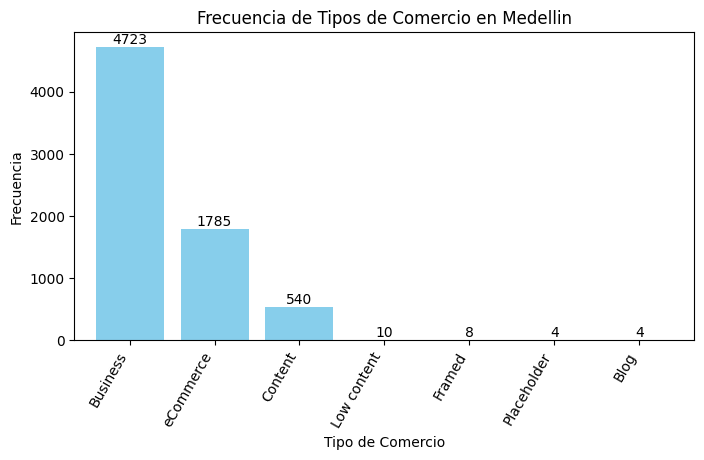

In [6]:
fig_commerce_type = plt.figure(figsize=(8, 4))
ax = data_medellin["type"].value_counts().plot(kind='bar', width=0.8, color='skyblue')

# Añadir el valor de la frecuencia sobre cada barra
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)

plt.xticks(rotation=60, ha="right")
plt.grid(False)
plt.xlabel("Tipo de Comercio")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Tipos de Comercio en Medellin")

In [7]:
#Filtrar datos por tipo de comercio
business = data_medellin[data_medellin["type"]=="Business"]
content = data_medellin[data_medellin["type"]=="Content"]
eCommerce = data_medellin[data_medellin["type"]=="eCommerce"]


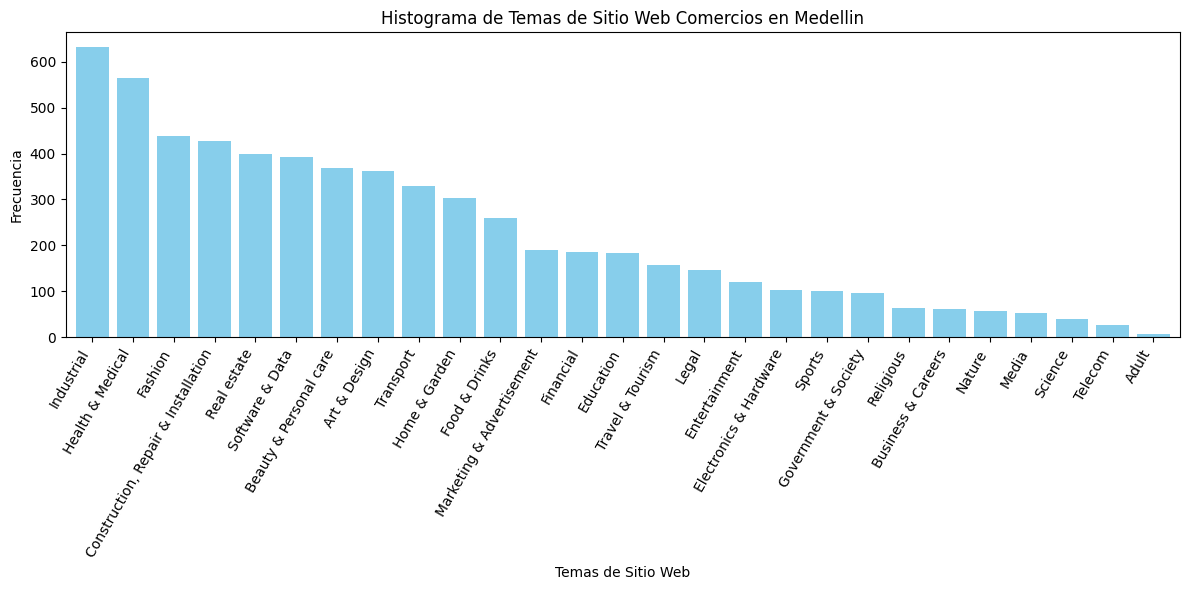

In [8]:
plain_websiteTopics = np.array([item for sublist in np.array(data_medellin["websitetopics"]) for item in (sublist if isinstance(sublist, list) else [sublist])])
websiteTopics_series = pd.Series(plain_websiteTopics)
fig_websiteTopics = plt.figure(figsize=(12, 6))

websiteTopics_series.value_counts().plot(kind='bar', width=0.8, color='skyblue')

# Ajustes adicionales
plt.xticks(rotation=60, ha="right")
plt.xlabel("Temas de Sitio Web")
plt.ylabel("Frecuencia")
plt.title("Histograma de Temas de Sitio Web Comercios en Medellin")
plt.grid(False)
plt.tight_layout()
plt.show()

<Axes: >

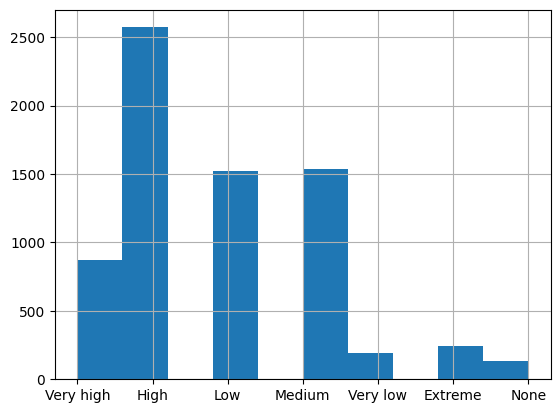

In [15]:
data_medellin["activity"].hist()

In [16]:
#Filtrar datos por actividad
extreme_act = data_medellin[data_medellin["activity"] == "Extreme"]
very_high_act = data_medellin[data_medellin["activity"] == "Very high"]
high_act = data_medellin[data_medellin["activity"] == "High"]
medium_act = data_medellin[data_medellin["activity"] == "Medium"]
low_act = data_medellin[data_medellin["activity"] == "Low"]
very_low_act = data_medellin[data_medellin["activity"] == "Very low"]

In [40]:
gps_info = data_medellin["gps"].values
gps_coordinates_str = gps_info[gps_info != None]
gps_coordinates = np.asarray([i.split(',') for i in gps_coordinates_str], dtype=float)
np.savetxt('coordenadas_comercios.txt', gps_coordinates)